In [1]:
import os
os.chdir('..')

In [2]:
from src.modules import connect_lhl, test_models

# Test Iteration

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

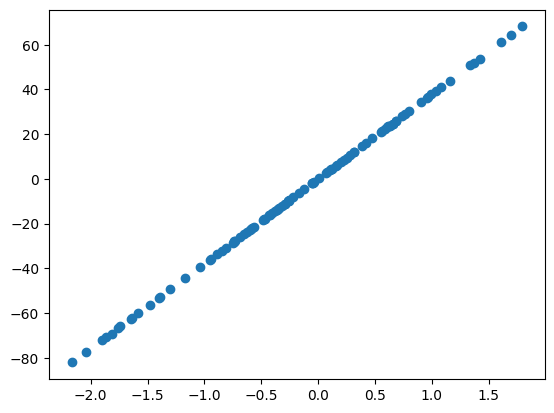

In [4]:
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)

from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)

# plot regression dataset
pyplot.scatter(X,y)
pyplot.show()

In [5]:
test_iteration = test_models.test_models(X, target = y)
test_iteration.create_models()
test_iteration_output = test_iteration.run_models()

In [6]:
test_iteration_output.sort_values('R2', ascending = False)

,MAE,RMSE,R2,ADJR2
linear,0.082418,0.098793,0.999993,0.999993
polynomial,0.084572,0.099577,0.999993,0.999993
sgd,0.098065,0.113119,0.999991,0.999991
ridge,0.415782,0.499053,0.999823,0.999823
lasso,0.938957,1.139515,0.999078,0.999078
voting_r,0.751789,1.163625,0.999038,0.999038
d_tree,1.207944,1.794960,0.997712,0.997712
xgb,1.206025,1.796651,0.997707,0.997707
g_boost,1.214729,1.797796,0.997704,0.997704
r_forest,5.592597,7.346999,0.961662,0.961662


# Iteration 1
### Best r2 = .024 (linear regression) 
### (160 features based on based on flight_data_engineered_trans)

- year
- month
- day
- mean_arr_delay
- median_arr_delay
- is_weekend
- is_holiday
- crs_dep_time_hour
- crs_arr_time_hour
- crs_elapsed_time_log
- distance_log
- mkt_unique_carrier
- branded_code_share
- op_unique_carrier
- season
- day_of_week
- crs_dep_time_of_day
- origin_state
- dest_state
- origin_region
- dest_region
- haul

Engineered new features based on flight date (is_weekend, is_holiday, season, day_of_week), expected departure/arrival time (departure / arrival hour, time of day), distance (long, medium, short haul), origin/dest (state, region) time to simplify the data and make it easier for the model to find patterns.

Used PCA to reduce the number of features from 204 to 160.



In [8]:
import pickle

with open(r'data\iteration1','rb') as flight_data_file:
     df_pca = pickle.load(flight_data_file)

In [10]:
import pickle

with open(r'data\flight_data_engineered_trans.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [11]:
X = df_pca
y = df_flights['arr_delay']

In [12]:
iteration1 = test_models.test_models(X, target = y)
iteration1.create_models()
iteration1_output = iteration1.run_models()

In [13]:
# iteration1_output

,MAE,RMSE,R2,ADJR2
linear,1.523221e-02,2.937907e-02,2.435799e-02,1.800839e-02
ridge,1.523221e-02,2.937907e-02,2.435805e-02,1.800845e-02
lasso,1.548992e-02,2.974360e-02,-3.100745e-06,-6.511246e-03
polynomial,7.590872e+06,2.235650e+08,-5.649655e+19,-5.686423e+19
sgd,1.018934e+09,2.234284e+10,-5.642753e+23,-5.679477e+23
svr,6.566698e-02,6.998235e-02,-4.535940e+00,-4.571969e+00
d_tree,2.226576e-02,4.502543e-02,-1.291554e+00,-1.306467e+00
r_forest,1.535722e-02,2.964348e-02,6.717983e-03,2.535795e-04
g_boost,1.524148e-02,2.962571e-02,7.908268e-03,1.451611e-03
voting_r,1.541009e-02,2.942985e-02,2.098239e-02,1.461082e-02


# Iteration 2
### Best r2 = .029 (linear regression) 
### (55 features based on flight_data_engineered_trans2)

- crs_elapsed_time
- mean_arr_delay
- is_weekend
- is_holiday
- mean_origin_airport_delay
- mean_dest_airport_delay
- op_unique_carrier_9E
- season
- day_of_week
- crs_dep_time_of_day / crs_arr_time_of_day
- origin/dest region
- haul

Removed dimensions that were essentially different versions of the same information when we learned that showing the same information in multiple ways would not improve the model, and in fact would reduce model performance because it introduces more noise. (e.g. dropped median_arr_delay and kept mean_arr_delay; dropped crs_dep_time_hour and kept crs_dep_time_of_day)

Added new dimensions of mean_origin_airport_delay / mean_dest_airport_delay to capture the effect on individual flight delays of how much delay each airport experiences on average.

Used PCA to reduce from 68 features to 55.

In [4]:
import pickle

with open(r'data\iteration2','rb') as flight_data_file:
     df_pca = pickle.load(flight_data_file)

In [5]:
import pickle

with open(r'data\flight_data_engineered_trans2.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [6]:
df_pca.shape

(98363, 55)

In [7]:
df_flights.shape

(98363, 68)

In [8]:
X = df_pca
y = df_flights['arr_delay']

In [10]:
iteration2 = test_models.test_models(X, target = y)
iteration2.create_models()
iteration2_output = iteration2.run_models()

In [11]:
iteration2_output

,MAE,RMSE,R2,ADJR2
linear,5.026263e-01,1.009676e+00,2.946608e-02,2.733008e-02
ridge,5.026260e-01,1.009676e+00,2.946614e-02,2.733014e-02
lasso,5.111926e-01,1.024901e+00,-2.321515e-05,-2.224114e-03
polynomial,5.093993e-01,1.171602e+00,-3.067929e-01,-3.096689e-01
sgd,9.523003e+08,2.004923e+10,-3.826853e+20,-3.835275e+20
svr,4.464461e-01,1.033706e+00,-1.727942e-02,-1.951830e-02
d_tree,7.254223e-01,1.523192e+00,-1.208795e+00,-1.213656e+00
r_forest,5.052031e-01,1.019944e+00,9.625756e-03,7.446093e-03
g_boost,4.999894e-01,1.014940e+00,1.932060e-02,1.716227e-02
voting_r,5.062025e-01,1.009469e+00,2.986385e-02,2.772873e-02


# Iteration 3
### Best r2 = 0.16
### (130 features based on original iteration6)

- year/month/day
- crs departure hour/minute
- crs arrival hour/minute
- crs elapsed time/distance
- mkt carrier
- op carrier
- state

Used a baseline dataset from prior to feature engineering and used PCA to reduce from 153 features to 130.

In [12]:
import pickle

with open(r'data\iteration3','rb') as flight_data_file:
     df_pca = pickle.load(flight_data_file)

In [15]:
import pandas as pd

df_flights = pd.read_csv(r'csvs\iteration_6.csv', sep=',')
df_flights.head()

,crs_elapsed_time,distance,arr_delay,fl_date_year,fl_date_month,fl_date_day,crs_dep_time_hour,crs_dep_time_minute,crs_arr_time_hour,crs_arr_time_minute,...,dest_state_ TT,dest_state_ TX,dest_state_ UT,dest_state_ VA,dest_state_ VI,dest_state_ VT,dest_state_ WA,dest_state_ WI,dest_state_ WV,dest_state_ WY
0,140,986,19.0,2018,1,1,19.0,30.0,23.0,50.0,...,0,0,0,0,0,0,0,0,0,0
1,150,1099,46.0,2018,1,1,21.0,25.0,15.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2,150,1099,-9.0,2018,1,1,6.0,50.0,11.0,20.0,...,0,0,0,0,0,0,0,0,0,0
3,55,197,-3.0,2018,1,1,7.0,35.0,8.0,30.0,...,0,0,0,0,0,0,0,0,0,0
4,55,197,37.0,2018,1,1,17.0,40.0,18.0,35.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = df_pca
y = df_flights['arr_delay']

In [19]:
iteration3 = test_models.test_models(X, target = y)
iteration3.create_models()
iteration3_output = iteration3.run_models()

In [20]:
iteration3_output

,MAE,RMSE,R2,ADJR2
linear,2.464413e+01,5.025559e+01,1.610936e-02,1.094532e-02
ridge,2.464413e+01,5.025559e+01,1.610939e-02,1.094535e-02
lasso,2.466791e+01,5.045167e+01,8.416626e-03,3.212205e-03
polynomial,1.482729e+09,7.802732e+10,-2.371765e+18,-2.384213e+18
sgd,7.143273e+08,1.696160e+10,-1.120758e+17,-1.126640e+17
svr,2.186485e+01,5.183423e+01,-4.667396e-02,-5.216753e-02
d_tree,3.588449e+01,7.283707e+01,-1.066727e+00,-1.077574e+00
r_forest,2.469289e+01,5.048668e+01,7.040118e-03,1.828472e-03
g_boost,2.468313e+01,5.052588e+01,5.497413e-03,2.776703e-04
voting_r,2.514696e+01,5.040588e+01,1.021584e-02,5.020863e-03


# Iteration 4
### Best r2 = 0.48
### (1 feature based on flight_data_engineered3)

Calculated the mean arrival delay by flight number by grouping flight number + carrier + time of day, and predicted the mean arrival delay

In [2]:
import pickle

with open(r'..\data\flight_data_engineered3.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [5]:
df_flights.head(20)

,mean_flight_num_delay,arr_delay
0,-0.666667,19.0
1,46.000000,46.0
2,-9.000000,-9.0
3,-14.000000,-3.0
4,37.000000,37.0
5,15.000000,15.0
6,29.000000,29.0
7,-8.000000,5.0
8,-8.500000,3.0
9,71.000000,71.0


In [5]:
X = df_flights['mean_flight_num_delay'].to_numpy().reshape(-1, 1)
y = df_flights['arr_delay']

In [6]:
iteration4 = test_models.test_models(X, target = y)
iteration4.create_models()
iteration4_output = iteration4.run_models()

In [9]:
iteration4_output.sort_values(by='R2_test', ascending=False)

,MAE_test,MAE_train,RMSE_test,RMSE_train,R2_test,R2_train,ADJR2_test,ADJR2_train
linear,15.221647,15.392797,36.407460,34.151856,0.492709,0.485384,0.492709,0.485384
ridge,15.221711,15.392862,36.407493,34.151856,0.492708,0.485384,0.492708,0.485384
polynomial,15.197644,15.355645,36.486101,34.140478,0.490516,0.485727,0.490516,0.485727
lasso,15.370936,15.545292,36.493779,34.166493,0.490301,0.484943,0.490301,0.484943
sgd,15.309494,15.750729,36.497936,34.245050,0.490185,0.482572,0.490185,0.482572
r_forest,18.072724,18.122804,39.210367,35.901627,0.411593,0.431301,0.411593,0.431301
g_boost,15.522921,15.364055,39.487800,33.617242,0.403237,0.501370,0.403237,0.501370
voting_r,15.691872,15.270631,39.558562,33.401120,0.401096,0.507760,0.401096,0.507760
xgb,15.983414,15.201328,43.680043,33.057213,0.269799,0.517845,0.269799,0.517845
d_tree,16.588934,15.123663,45.439398,32.918182,0.209792,0.521892,0.209792,0.521892


# Iteration 5
### Best r2 = 
### (1 feature based on flight_data_engineered4)

Same as Iteration 4 but with 500K random samples from training data instead of 100K

In [10]:
import pickle

with open(r'data\flight_data_engineered4.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [11]:
df_flights.head()

,mean_flight_num_delay,arr_delay
0,-4.125000,14.0
1,-2.500000,-3.0
2,32.666667,111.0
3,-0.777778,59.0
4,10.000000,10.0


In [12]:
X = df_flights['mean_flight_num_delay'].to_numpy().reshape(-1, 1)
y = df_flights['arr_delay']

In [13]:
iteration5 = test_models.test_models(X, target = y)
iteration5.create_models()
iteration5_output = iteration5.run_models()

In [14]:
iteration5_output.sort_values(by='R2_test', ascending=False)

,MAE_test,MAE_train,RMSE_test,RMSE_train,R2_test,R2_train,ADJR2_test,ADJR2_train
ridge,21.850371,21.991957,43.691004,44.756215,0.188586,0.208773,0.188586,0.208773
linear,21.850377,21.991963,43.691004,44.756215,0.188586,0.208773,0.188586,0.208773
polynomial,21.856263,21.997955,43.691774,44.756104,0.188558,0.208777,0.188558,0.208777
lasso,21.825535,21.970358,43.692425,44.767385,0.188534,0.208378,0.188534,0.208378
sgd,22.129421,22.172572,43.715183,44.780415,0.187688,0.207917,0.187688,0.207917
g_boost,21.927521,21.989219,44.184102,44.651767,0.170168,0.212461,0.170168,0.212461
r_forest,22.579109,22.735551,44.500860,45.795312,0.158227,0.171607,0.158227,0.171607
voting_r,22.146241,21.934324,44.905084,44.464805,0.142865,0.219043,0.142865,0.219043
xgb,22.136521,21.944924,45.838242,44.410437,0.106871,0.220951,0.106871,0.220951
d_tree,22.778344,21.891308,47.734766,44.240420,0.031437,0.226905,0.031437,0.226905


# Iteration 6

In [11]:
def IFPE_Regression(X_train, y_train, X_test, y_test, regressor, deg=None):
    
    ### INSTANTIATE THE MODEL

    ## LINEAR MODELS

    # ordinary least squares
    if regressor == 'linear':
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression()
    
    # ridge regression
    elif regressor == 'ridge':
        from sklearn.linear_model import Ridge
        reg = Ridge(random_state=0)

    # lasso regression
    elif regressor == 'lasso':
        from sklearn.linear_model import Lasso
        reg = Lasso(random_state=0)

    # polynomial linear regression - need to add polynomial features first
    # https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
    # https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
    elif regressor == 'polynomial':
        from sklearn.linear_model import LinearRegression
        from sklearn.preprocessing import PolynomialFeatures
        poly = PolynomialFeatures(degree = deg)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.fit_transform(X_test)
        X_train = X_poly_train
        X_test = X_poly_test

        # poly.fit(X_poly, y_train)
        reg = LinearRegression()

    # stochastic gradient descent
    elif regressor == 'sgd':
        from sklearn.linear_model import SGDRegressor
        reg = SGDRegressor(random_state=0)
    
    ## SUPPORT VECTOR MACHINES

    # SVM regression https://scikit-learn.org/stable/modules/svm.html#regression
    elif regressor == 'svm':
        from sklearn import svm
        reg = svm.SVR()

    ## DECISION TREES

    # decision tree
    elif regressor == 'dt':
        from sklearn import tree
        reg = tree.DecisionTreeRegressor(random_state=0)

    ## ENSEMBLE METHODS

    # random forest
    elif regressor =='rf':
        from sklearn.ensemble import RandomForestRegressor
        reg = RandomForestRegressor(max_depth=2, random_state=0)

    # gradient boost
    elif regressor =='gb':
        from sklearn.ensemble import GradientBoostingRegressor
        reg = GradientBoostingRegressor(random_state=0)

    # voting regressor
    elif regressor =='vr':
        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.linear_model import LinearRegression
        from sklearn.ensemble import VotingRegressor
        reg1 = GradientBoostingRegressor(random_state=1)
        reg2 = RandomForestRegressor(random_state=1)
        reg3 = LinearRegression()
        reg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

    # xgboost
    elif regressor == 'xgb':
        import xgboost as xgb
        reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=0)



    ### FIT THE MODEL

    reg.fit(X_train, y_train)




    ### PREDICT THE RESPONSE FOR THE TEST DATASET

    y_pred = reg.predict(X_test)




    ### EVALUATE THE MODEL

    # Mean Absolute Error
    from sklearn.metrics import mean_absolute_error
    MAE = mean_absolute_error(y_test, y_pred)

    # Root Mean Square Error
    from sklearn.metrics import mean_squared_error
    RMSE = mean_squared_error(y_test, y_pred, squared=False)

    # r2
    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)

    # Adjusted r2
    n = len(X_test)
    p = len(X_test[0,:])

    Adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

    ### COMPARE MODELS
    
    import pandas as pd
    model_comparison = pd.DataFrame({
        'Mean Absolute Error': MAE,
        'Root Mean Square Error': RMSE,
        'R Squared': r2,
        'Adjusted R Squared': Adj_r2
    }, index  = [str(regressor)])
    
    return model_comparison

In [6]:
import pickle

with open(r'..\data\fe_flight_num_TRAINING.pickle','rb') as flight_data_file:
     df_flights_TRAIN = pickle.load(flight_data_file)

In [8]:
df_flights_TRAIN.head()

,mean_flight_num_delay,arr_delay
0,-5.533333,-14.0
1,-1.500000,-11.0
2,6.066726,-5.0
3,7.961089,-11.0
4,15.913043,-6.0


In [7]:
import pickle

with open(r'..\data\fe_flight_num_TEST.pickle','rb') as flight_data_file:
     df_flights_TEST = pickle.load(flight_data_file)

In [9]:
df_flights_TEST.head()

,mean_flight_num_delay,arr_delay
0,16.857143,2.0
1,7.961089,69.0
2,-6.272727,-4.0
3,10.821680,-13.0
4,6.066726,48.0


In [20]:
X_train = df_flights_TRAIN.drop('arr_delay',axis=1).to_numpy()
X_test = df_flights_TEST.drop('arr_delay',axis=1).to_numpy()
y_train = df_flights_TRAIN['arr_delay'].to_numpy()
y_test = df_flights_TEST['arr_delay'].to_numpy()

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(74238, 1)
(24747, 1)
(74238,)
(24747,)


In [22]:
model_comparison_linear = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='linear', deg=None)
model_comparison_linear

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
linear,25.487395,52.603995,-0.023867,-0.023908


In [23]:
model_comparison_ridge = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='ridge', deg=None)
model_comparison_ridge

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
ridge,25.487395,52.603994,-0.023867,-0.023908


In [24]:
model_comparison_lasso = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='lasso', deg=None)
model_comparison_lasso

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
lasso,25.475419,52.591782,-0.023391,-0.023433


In [25]:
model_comparison_poly2 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=2)
model_comparison_poly2

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,25.481948,52.606628,-0.023969,-0.024093


In [26]:
model_comparison_poly3 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=3)
model_comparison_poly3

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,25.479377,52.606011,-0.023945,-0.024111


In [27]:
model_comparison_sgd = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='sgd', deg=None)
model_comparison_sgd

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
sgd,27.565762,53.989242,-0.078501,-0.078544


In [28]:
# model_comparison_svm = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='svm', deg=None)
# model_comparison_svm

In [29]:
model_comparison_dt = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='dt', deg=None)
model_comparison_dt

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
dt,25.512808,52.621509,-0.024549,-0.02459


In [30]:
model_comparison_rf = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='rf', deg=None)
model_comparison_rf

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,25.267898,52.356374,-0.01425,-0.014291


In [31]:
model_comparison_gb = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='gb', deg=None)
model_comparison_gb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
gb,25.510473,52.619572,-0.024473,-0.024514


In [32]:
model_comparison_vr = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='vr', deg=None)
model_comparison_vr

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,25.498079,52.615276,-0.024306,-0.024347


In [33]:
model_comparison_xgb = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='xgb', deg=None)
model_comparison_xgb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
xgb,25.512753,52.621616,-0.024553,-0.024594


In [35]:
import pandas as pd
model_comparison = pd.concat([model_comparison_linear,model_comparison_ridge,model_comparison_lasso,model_comparison_poly2,model_comparison_poly3,model_comparison_sgd,model_comparison_dt,model_comparison_rf,model_comparison_gb,model_comparison_vr,model_comparison_xgb])


In [36]:
model_comparison.sort_values('R Squared', ascending=False)

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,25.267898,52.356374,-0.014250,-0.014291
lasso,25.475419,52.591782,-0.023391,-0.023433
ridge,25.487395,52.603994,-0.023867,-0.023908
linear,25.487395,52.603995,-0.023867,-0.023908
polynomial,25.479377,52.606011,-0.023945,-0.024111
polynomial,25.481948,52.606628,-0.023969,-0.024093
vr,25.498079,52.615276,-0.024306,-0.024347
gb,25.510473,52.619572,-0.024473,-0.024514
dt,25.512808,52.621509,-0.024549,-0.024590
xgb,25.512753,52.621616,-0.024553,-0.024594


# Iteration 7

In [ ]:
def IFPE_Regression(X_train, y_train, X_test, y_test, regressor, deg=None):
    
    ### INSTANTIATE THE MODEL

    ## LINEAR MODELS

    # ordinary least squares
    if regressor == 'linear':
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression()
    
    # ridge regression
    elif regressor == 'ridge':
        from sklearn.linear_model import Ridge
        reg = Ridge(random_state=0)

    # lasso regression
    elif regressor == 'lasso':
        from sklearn.linear_model import Lasso
        reg = Lasso(random_state=0)

    # polynomial linear regression - need to add polynomial features first
    # https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
    # https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
    elif regressor == 'polynomial':
        from sklearn.linear_model import LinearRegression
        from sklearn.preprocessing import PolynomialFeatures
        poly = PolynomialFeatures(degree = deg)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.fit_transform(X_test)
        X_train = X_poly_train
        X_test = X_poly_test

        # poly.fit(X_poly, y_train)
        reg = LinearRegression()

    # stochastic gradient descent
    elif regressor == 'sgd':
        from sklearn.linear_model import SGDRegressor
        reg = SGDRegressor(random_state=0)
    
    ## SUPPORT VECTOR MACHINES

    # SVM regression https://scikit-learn.org/stable/modules/svm.html#regression
    elif regressor == 'svm':
        from sklearn import svm
        reg = svm.SVR()

    ## DECISION TREES

    # decision tree
    elif regressor == 'dt':
        from sklearn import tree
        reg = tree.DecisionTreeRegressor(random_state=0)

    ## ENSEMBLE METHODS

    # random forest
    elif regressor =='rf':
        from sklearn.ensemble import RandomForestRegressor
        reg = RandomForestRegressor(max_depth=2, random_state=0)

    # gradient boost
    elif regressor =='gb':
        from sklearn.ensemble import GradientBoostingRegressor
        reg = GradientBoostingRegressor(random_state=0)

    # voting regressor
    elif regressor =='vr':
        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.linear_model import LinearRegression
        from sklearn.ensemble import VotingRegressor
        reg1 = GradientBoostingRegressor(random_state=1)
        reg2 = RandomForestRegressor(random_state=1)
        reg3 = LinearRegression()
        reg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

    # xgboost
    elif regressor == 'xgb':
        import xgboost as xgb
        reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=0)



    ### FIT THE MODEL

    reg.fit(X_train, y_train)




    ### PREDICT THE RESPONSE FOR THE TEST DATASET

    y_pred = reg.predict(X_test)




    ### EVALUATE THE MODEL

    # Mean Absolute Error
    from sklearn.metrics import mean_absolute_error
    MAE = mean_absolute_error(y_test, y_pred)

    # Root Mean Square Error
    from sklearn.metrics import mean_squared_error
    RMSE = mean_squared_error(y_test, y_pred, squared=False)

    # r2
    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)

    # Adjusted r2
    n = len(X_test)
    p = len(X_test[0,:])

    Adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

    ### COMPARE MODELS
    
    import pandas as pd
    model_comparison = pd.DataFrame({
        'Mean Absolute Error': MAE,
        'Root Mean Square Error': RMSE,
        'R Squared': r2,
        'Adjusted R Squared': Adj_r2
    }, index  = [str(regressor)])
    
    return model_comparison

In [ ]:
import pickle

with open(r'..\data\fe_flight_num_TRAINING2_trans.pickle','rb') as flight_data_file:
     df_flights_TRAIN = pickle.load(flight_data_file)

In [ ]:
df_flights_TRAIN.head()

,mean_flight_num_delay,arr_delay
0,-5.533333,-14.0
1,-1.500000,-11.0
2,6.066726,-5.0
3,7.961089,-11.0
4,15.913043,-6.0


In [ ]:
import pickle

with open(r'..\data\fe_flight_num_TEST2_trans.pickle','rb') as flight_data_file:
     df_flights_TEST = pickle.load(flight_data_file)

In [ ]:
df_flights_TEST.head()

,mean_flight_num_delay,arr_delay
0,16.857143,2.0
1,7.961089,69.0
2,-6.272727,-4.0
3,10.821680,-13.0
4,6.066726,48.0


In [ ]:
X_train = df_flights_TRAIN.drop('arr_delay',axis=1).to_numpy()
X_test = df_flights_TEST.drop('arr_delay',axis=1).to_numpy()
y_train = df_flights_TRAIN['arr_delay'].to_numpy()
y_test = df_flights_TEST['arr_delay'].to_numpy()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(74238, 1)
(24747, 1)
(74238,)
(24747,)


In [ ]:
model_comparison_linear = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='linear', deg=None)
model_comparison_linear

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
linear,25.487395,52.603995,-0.023867,-0.023908


In [ ]:
model_comparison_ridge = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='ridge', deg=None)
model_comparison_ridge

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
ridge,25.487395,52.603994,-0.023867,-0.023908


In [ ]:
model_comparison_lasso = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='lasso', deg=None)
model_comparison_lasso

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
lasso,25.475419,52.591782,-0.023391,-0.023433


In [ ]:
model_comparison_poly2 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=2)
model_comparison_poly2

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,25.481948,52.606628,-0.023969,-0.024093


In [ ]:
model_comparison_poly3 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=3)
model_comparison_poly3

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,25.479377,52.606011,-0.023945,-0.024111


In [ ]:
model_comparison_sgd = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='sgd', deg=None)
model_comparison_sgd

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
sgd,27.565762,53.989242,-0.078501,-0.078544


In [ ]:
# model_comparison_svm = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='svm', deg=None)
# model_comparison_svm

In [ ]:
model_comparison_dt = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='dt', deg=None)
model_comparison_dt

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
dt,25.512808,52.621509,-0.024549,-0.02459


In [ ]:
model_comparison_rf = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='rf', deg=None)
model_comparison_rf

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,25.267898,52.356374,-0.01425,-0.014291


In [ ]:
model_comparison_gb = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='gb', deg=None)
model_comparison_gb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
gb,25.510473,52.619572,-0.024473,-0.024514


In [ ]:
model_comparison_vr = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='vr', deg=None)
model_comparison_vr

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,25.498079,52.615276,-0.024306,-0.024347


In [ ]:
model_comparison_xgb = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='xgb', deg=None)
model_comparison_xgb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
xgb,25.512753,52.621616,-0.024553,-0.024594


In [ ]:
import pandas as pd
model_comparison = pd.concat([model_comparison_linear,model_comparison_ridge,model_comparison_lasso,model_comparison_poly2,model_comparison_poly3,model_comparison_sgd,model_comparison_dt,model_comparison_rf,model_comparison_gb,model_comparison_vr,model_comparison_xgb])


In [ ]:
model_comparison.sort_values('R Squared', ascending=False)

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,25.267898,52.356374,-0.014250,-0.014291
lasso,25.475419,52.591782,-0.023391,-0.023433
ridge,25.487395,52.603994,-0.023867,-0.023908
linear,25.487395,52.603995,-0.023867,-0.023908
polynomial,25.479377,52.606011,-0.023945,-0.024111
polynomial,25.481948,52.606628,-0.023969,-0.024093
vr,25.498079,52.615276,-0.024306,-0.024347
gb,25.510473,52.619572,-0.024473,-0.024514
dt,25.512808,52.621509,-0.024549,-0.024590
xgb,25.512753,52.621616,-0.024553,-0.024594


# Iteration 8

In [32]:
def IFPE_Regression(X_train, y_train, X_test, y_test, regressor, deg=None):
    
    ### INSTANTIATE THE MODEL

    ## LINEAR MODELS

    # ordinary least squares
    if regressor == 'linear':
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression()
    
    # ridge regression
    elif regressor == 'ridge':
        from sklearn.linear_model import Ridge
        reg = Ridge(random_state=0)

    # lasso regression
    elif regressor == 'lasso':
        from sklearn.linear_model import Lasso
        reg = Lasso(random_state=0)

    # polynomial linear regression - need to add polynomial features first
    # https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
    # https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
    elif regressor == 'polynomial':
        from sklearn.linear_model import LinearRegression
        from sklearn.preprocessing import PolynomialFeatures
        poly = PolynomialFeatures(degree = deg)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.fit_transform(X_test)
        X_train = X_poly_train
        X_test = X_poly_test

        # poly.fit(X_poly, y_train)
        reg = LinearRegression()

    # stochastic gradient descent
    elif regressor == 'sgd':
        from sklearn.linear_model import SGDRegressor
        reg = SGDRegressor(random_state=0)
    
    ## SUPPORT VECTOR MACHINES

    # SVM regression https://scikit-learn.org/stable/modules/svm.html#regression
    elif regressor == 'svm':
        from sklearn import svm
        reg = svm.SVR()

    ## DECISION TREES

    # decision tree
    elif regressor == 'dt':
        from sklearn import tree
        reg = tree.DecisionTreeRegressor(random_state=0)

    ## ENSEMBLE METHODS

    # random forest
    elif regressor =='rf':
        from sklearn.ensemble import RandomForestRegressor
        reg = RandomForestRegressor(max_depth=2, random_state=0)

    # gradient boost
    elif regressor =='gb':
        from sklearn.ensemble import GradientBoostingRegressor
        reg = GradientBoostingRegressor(random_state=0)

    # voting regressor
    elif regressor =='vr':
        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.linear_model import LinearRegression
        from sklearn.ensemble import VotingRegressor
        reg1 = GradientBoostingRegressor(random_state=1)
        reg2 = RandomForestRegressor(random_state=1)
        reg3 = LinearRegression()
        reg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

    # xgboost
    elif regressor == 'xgb':
        import xgboost as xgb
        reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=0)



    ### FIT THE MODEL

    reg.fit(X_train, y_train)




    ### PREDICT THE RESPONSE FOR THE TEST DATASET

    y_pred = reg.predict(X_test)




    ### EVALUATE THE MODEL

    # Mean Absolute Error
    from sklearn.metrics import mean_absolute_error
    MAE = mean_absolute_error(y_test, y_pred)

    # Root Mean Square Error
    from sklearn.metrics import mean_squared_error
    RMSE = mean_squared_error(y_test, y_pred, squared=False)

    # r2
    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)

    # Adjusted r2
    n = len(X_test)
    p = len(X_test[0,:])

    Adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

    ### COMPARE MODELS
    
    import pandas as pd
    model_comparison = pd.DataFrame({
        'Mean Absolute Error': MAE,
        'Root Mean Square Error': RMSE,
        'R Squared': r2,
        'Adjusted R Squared': Adj_r2
    }, index  = [str(regressor)])
    
    return model_comparison, reg

In [33]:
import pickle

with open(r'..\data\fe_flight_num_TRAINING_2_trans.pickle','rb') as flight_data_file:
     df_flights_TRAIN = pickle.load(flight_data_file)

In [34]:
df_flights_TRAIN.head()

,mean_flight_num_delay,mean_month_arr_delay,is_weekend,is_holiday,arr_delay,crs_dep_time_of_day_early morning,crs_dep_time_of_day_late morning,crs_dep_time_of_day_midday,crs_dep_time_of_day_late afternoon,crs_dep_time_of_day_evening,...,origin_region_Midwest,origin_region_Northeast,origin_region_Other,origin_region_South,origin_region_West,dest_region_Midwest,dest_region_Northeast,dest_region_Other,dest_region_South,dest_region_West
0,-0.832543,0.240826,-0.604262,-0.157257,-0.407623,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,-0.520942,1.097784,-0.604262,-0.157257,-0.344193,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0.063635,-0.032054,-0.604262,-0.157257,-0.217333,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.209986,-0.032054,-0.604262,-0.157257,-0.344193,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,0.824325,-1.593737,-0.604262,-0.157257,-0.238476,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [35]:
import pickle

with open(r'..\data\fe_flight_num_TEST_2_trans.pickle','rb') as flight_data_file:
     df_flights_TEST = pickle.load(flight_data_file)

In [36]:
df_flights_TEST.head()

,mean_flight_num_delay,mean_month_arr_delay,is_weekend,is_holiday,arr_delay,crs_dep_time_of_day_early morning,crs_dep_time_of_day_late morning,crs_dep_time_of_day_midday,crs_dep_time_of_day_late afternoon,crs_dep_time_of_day_evening,...,origin_region_Midwest,origin_region_Northeast,origin_region_Other,origin_region_South,origin_region_West,dest_region_Midwest,dest_region_Northeast,dest_region_Other,dest_region_South,dest_region_West
0,0.897262,-0.032054,-0.604262,-0.157257,-0.069330,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0.209986,0.554849,-0.604262,-0.157257,1.347269,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,-0.889666,1.097784,-0.604262,-0.157257,-0.196190,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.430985,0.240826,-0.604262,-0.157257,-0.386479,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0.063635,-0.678107,1.654912,-0.157257,0.903261,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [37]:
X_train = df_flights_TRAIN.drop('arr_delay',axis=1).to_numpy()
X_test = df_flights_TEST.drop('arr_delay',axis=1).to_numpy()
y_train = df_flights_TRAIN['arr_delay'].to_numpy()
y_test = df_flights_TEST['arr_delay'].to_numpy()

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(74243, 30)
(24751, 30)
(74243,)
(24751,)


In [40]:
model_comparison_linear, reg = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='linear', deg=None)
model_comparison_linear

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
linear,0.538543,1.110491,-0.020728,-0.021966


In [41]:
reg

LinearRegression()

In [19]:
model_comparison_ridge = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='ridge', deg=None)
model_comparison_ridge

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
ridge,0.539119,1.110433,-0.020621,-0.021859


In [20]:
model_comparison_lasso = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='lasso', deg=None)
model_comparison_lasso

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
lasso,0.527031,1.099202,-0.00008,-0.001294


In [21]:
model_comparison_poly2 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=2)
model_comparison_poly2

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,0.535686,1.111711,-0.022971,-0.043891


In [22]:
model_comparison_poly3 = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='polynomial', deg=3)
model_comparison_poly3

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
polynomial,129042.660798,7.332512e+06,-4.450262e+13,-5.708717e+13


In [23]:
model_comparison_sgd = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='sgd', deg=None)
model_comparison_sgd

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
sgd,0.543777,1.119654,-0.037642,-0.038902


In [24]:
# model_comparison_svm = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='svm', deg=None)
# model_comparison_svm

In [25]:
model_comparison_dt = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='dt', deg=None)
model_comparison_dt

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
dt,0.728527,1.457458,-0.758216,-0.760349


In [26]:
model_comparison_rf = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='rf', deg=None)
model_comparison_rf

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
rf,0.533542,1.106474,-0.013357,-0.014586


In [27]:
model_comparison_gb = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='gb', deg=None)
model_comparison_gb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
gb,0.53676,1.120232,-0.038713,-0.039974


In [28]:
model_comparison_vr = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='vr', deg=None)
model_comparison_vr

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
vr,0.548522,1.122852,-0.043577,-0.044844


In [29]:
model_comparison_xgb = IFPE_Regression(X_train, y_train, X_test, y_test, regressor='xgb', deg=None)
model_comparison_xgb

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
xgb,0.542004,1.145753,-0.08658,-0.087899


In [30]:
import pandas as pd
model_comparison = pd.concat([model_comparison_linear,model_comparison_ridge,model_comparison_lasso,model_comparison_poly2,model_comparison_poly3,model_comparison_sgd,model_comparison_dt,model_comparison_rf,model_comparison_gb,model_comparison_vr,model_comparison_xgb])


In [31]:
model_comparison.sort_values('R Squared', ascending=False)

,Mean Absolute Error,Root Mean Square Error,R Squared,Adjusted R Squared
lasso,0.527031,1.099202e+00,-8.049281e-05,-1.294183e-03
rf,0.533542,1.106474e+00,-1.335662e-02,-1.458642e-02
ridge,0.539119,1.110433e+00,-2.062061e-02,-2.185923e-02
linear,0.538543,1.110491e+00,-2.072773e-02,-2.196648e-02
polynomial,0.535686,1.111711e+00,-2.297122e-02,-4.389123e-02
sgd,0.543777,1.119654e+00,-3.764223e-02,-3.890151e-02
gb,0.536760,1.120232e+00,-3.871325e-02,-3.997383e-02
vr,0.548522,1.122852e+00,-4.357745e-02,-4.484393e-02
xgb,0.542004,1.145753e+00,-8.658006e-02,-8.789872e-02
dt,0.728527,1.457458e+00,-7.582156e-01,-7.603493e-01
